# API-201 ABC REVIEW SESSION #8

**Friday, November 4**

# Table of Contents
1. [Lecture Recap](#Lecture-Recap)
2. [Exercise 1 - Applying Statistical Significance](#Exercise1)
3. [Exercise 2 - Factors Associated with Infant Birth Weight](#Exercise2)

# Lecture Recap <a class="anchor" id="Lecture-Recap"></a>

## Statistical power 

* A **type 1 error** occurs when the null hypothesis is true, but the test incorrectly rejects it: **P(Reject|$H_0$ is true)**. 
    * Usually 5% because this corresponds to a rule of assuming the null hypothesis is true and rejecting it only if the results as extreme as observed would have occurred by chance 5% of the time if true.
    
* A **type 2 error** occurs when the null hypothesis is false, but the test fails to reject it: **P(Fail to reject|$H_0$ is false)**. 

* Type 2 error is related to power, as **Power = 1 – P(Fail to reject|$H_0$ is false).** Statistical power is the probability of detecting an effect when there is one.
* A study is **under-powered** when a study does not have enough power to detect practically significant effects. If a study had no detectable impact of an outcome of interest, then either there is no effect or the study is under-powered.
* Power increases with the size of the effect (in terms of absolute value) and with the sample size. 
    * A larger true effect size is further away from zero, and so the sampling distribution is centered around a number further from the null hypothesis. Therefore confidence intervals are less likely to include the null hypothesis of zero.
    * When you increase the sample size, if there is a true effect, the sampling distribution will become tighter around the true effect, shrinking the width of confidence intervals and making it less likely to reject the null.



### Power calculations in R

We can use the `pwr` package in R to perform power calculations. For calculating the power of a test of the difference of two proportions with the same sample size we can use the function `pwr.2p.test`. If we provide the sample size `n` and the true difference in proportions `h`, we can calculate the power: the probability a random sample will reject the null.

In [58]:
library(pwr)

# What is my power given effect size of 0.1 and sample size of 1000?
pwr.2p.test(h = 0.1, n = 1000)


     Difference of proportion power calculation for binomial distribution (arcsine transformation) 

              h = 0.1
              n = 1000
      sig.level = 0.05
          power = 0.6087795
    alternative = two.sided

NOTE: same sample sizes


We can use the same function to calculate the necessary sample size to get a given power, given a true difference in means.

In [59]:
# What sample size do I need to detect a significant difference in 80% of random samples 
# if the true difference is 10 percentage points?
pwr.2p.test(h = 0.1, power = 0.80)


     Difference of proportion power calculation for binomial distribution (arcsine transformation) 

              h = 0.1
              n = 1569.772
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: same sample sizes


Lastly, we can calculate the true difference that we could detect given power and sample size. This is sometimes called the **minimum detectable effect**.

In [60]:
# For what true difference will I have power of 0.8 given a sample size of 1000?
pwr.2p.test(n = 1000, power = 0.80)


     Difference of proportion power calculation for binomial distribution (arcsine transformation) 

              h = 0.1252923
              n = 1000
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: same sample sizes


**When would each of these calculations be helpful?**

Note, the `pwr` package also has other functions for calculating the power of many other tests, including a difference of proportions with different sample sizes.

# Exercise 1: Applying Statistical Significance <a class="anchor" id="Exercise1"></a>

## Example 1
**Despite following the same protocols, replications of published experiments frequently find effects of smaller magnitude or opposite sign than those in the initial studies. Provide one explanation for this fact.**

##### START
Journal editors and referees may be more likely to publish results that are statistically significant, that confirm some prior belief or, conversely, that are surprising. Researchers in turn face strong incentives to select which findings to write up and submit to journals based on the likelihood of ultimate publication. These behaviors lead to publication bias (Andrews and Kasy, 2019). 

This is related to **Principle 1**: *Consider what is being shown and what is not being shown.*
##### END

## Example 2
**When asked about health insurance coverage during the past 6 months, some people report whether they used health services in the last 6 months instead. Is this an example of measurement error? If so, do you think it is a systematic or random error?**

##### START
This is an example of measurement error. Poor households might be less familiar with insurance coverage, so they might be more likely to misreport their coverage status. If that’s the case, this is more likely a systematic error. 

This is related to **Principle 2**: *Understand where the data come from.*
##### END


## Example 3 

*Inspired by https://www.scribbr.com/research-bias/attrition-bias/)*

**You want to investigate whether an educational program can reduce the risk of drug abuse for college students. You have a treatment and control group, and will complete three waves of data collection to compare outcomes: a pre-test survey, one surveys during the program, and a post-test survey. Many students drop out over time, leading to a smaller sample at each point in time. We call this phenomenon *attrition*.**


**1. While checking your study data, you find no statistically significant differences between students who leave and those who stay. Is attrition a concern in this case?**

##### START
When attrition is random we don’t have to worry about attrition bias. However, attrition can still be harmful because it reduces your statistical power. 
##### END

**2. Now supposes that acording to the data, participants who leave report significantly higher levels of drug use than participants who stay. Is attrition a concern in this case?**

##### START
The study suffers from attrition bias, as participants who leave differ in specific ways from those who remain. They might drop out from the control group relative more often than from the treatment group, making the two groups less comparable. Ideally, we want both groups to be as similar as possible, differing only in terms of the intervention they receive.

This is related to **Principle 2**: *Understand where the data come from.*
##### END

## Example 4
**You suspect that female HKS students are more likely to have dogs than male HKS students. However your fellow student tells you they randomly surveyed 30 male students and 30 female students and calculated a p-value of 0.27 for the difference of proportions, so they say there is no difference. You obtain the data from your peer's study and find that 20% of female students have dogs and 10% of male students have dogs. The 95% confidence interval for the difference of proportions is [-0.08, 0.28]. Who is right?**

##### START

It is hard to say given the evidence. Your peer's under-powered study demonstrates a difference in the sample, but that difference may result from sampling fluctuations. If you are determined to know the truth, you should conduct your own study with a larger sample after calculating the sample size you need to achieve adequate power.

##### END

## Example 5
**A growing literature finds evidence of *racial concordance* in medicine, wherein black patients have better health outcomes if they have black doctors rather than doctors of another race. You are interested if black women are more likely to have a black doctor than black men, so you sample 500 black women and 500 black men. You present the following bar graph of the proportions with 95% confidence intervals.**

![](concordance_plot.png)

**You test the null hypothesis $H_0: p_1 - p_2 = 0$ and obtain a p-value of 0.026; therefore, you reject the null hypothesis and state that there is a statistically significant difference between black men and women. Your classmate says that cannot be true because the 95% confidence intervals overlap. Who is right?**

##### START
You are right! 

1. When confidence intervals for two groups don't overlap, then we know there is a statistically significant difference.
2. When confidence intervals for two groups do overlap and contain the other groups' sample proportion, we know there is no significant difference.
3. When confidence intervals for two groups overlap but don't contain the other groups' sample proportion, then we need to test the difference of proportions to know for sure.

We are in case (3.), and the test indicates we should reject.
##### END


## Example 6
**You are put in charge of a new initiative to help women pay their medical expenses. Your organization is committed to addressing disparities between men and women, so you want your resources to go to groups with the largest difference in out-of-pocket medical costs between men and women. You compare estimates from two sources:**

1. A random sample of 400 men and 400 women ages 18-64. In the sample, women pay $500 on health care more than men on average each year. The 95% confidence interval is [-100, 1100].

2. A large administrative dataset on the health spending of Americans ages 65+. In the sample, women pay $50 more than men on average each year. The 95% confidence interval is [40, 60].

**Based on these results, would you direct funds to women under 65 or over 65?**

##### START

The first study finds an economically large but statistically insignificant difference in health care spending between men and women below the age of 65. The second study finds an economically small but statistically significant difference in spending between men and women above the age of 65. 

From these estimates we can be nearly sure there is a difference in medical spending between men and women 65+. However, this difference appears to be fairly small. If your organization's funds are allocated only to reduce disparities you may be able to help a lot of women a little bit by giving them each $50 to cover their medical costs. 

The random sample of under 65's indicates that there may be an economically large difference between men and women, but there is substantial uncertainty in this estimate, meaning that donors who value evidence-based philanthropy may be skeptical of donating here without more evidence. Additional research to justify donating to this group or identifying high-need individuals within the group may be useful.

##### END

## Example 7
**After a long and storied career, you find yourself on an FDA panel that will decide whether the newest migraine drug will be approved. At question is a study that found no significant difference in migraine symptoms between two groups that randomly received either the drug or a placebo. The study *did find* a significant improvement in symptoms between women ages 18-29 who received the drug relative to placebo, but there was no improvement in any other gender or age group. The company developing the drug is seeking approval for use only by women ages 18-29. If there are no known safety concerns with the drug, would you approve it?**

##### START

Because we reject the null hypothesis 5% of the time when it is true, as researchers test more and more hypotheses, the probability of finding at least one significant difference increases towards 100%. While the effect of the drug may truly be positive for women ages 18-29, it is also quite possible that the statistically significant effect in this group is due to sampling fluctuations in combination with multiple hypothesis testing. The company developing the drug found no significant difference in the overall population and for all but one of the age-and-gender groups. The number of tests this involves means that finding at least one significant difference if there is truly no effect was far more likely than just 5%.

##### END


# Exercise 2: Factors Associated with Infant Birth Weight <a class="anchor" id="Exercise2"></a>

In [73]:
library(tidyverse)
library(MASS)
data(birthwt)

For this exercise, we will identify factors associated with low infant birth weight using data on 189 births collected at the Baystate Medical Centre, Springfield, Massachusetts during 1986. The variables of interest are `bwt` (birth weight) and the binary variable `low` (low birth weight).

## Data Dictionary

* `low`: indicator of birth weight less than 2,500 grams
* `age`: mother's age in years
* `lwt`: mother's weight at last menstrual period
* `race` : mother's race (1 = white, 2 = black, 3 = other).
* `smoke` : smoking status during pregnancy.
* `ptl` : number of previous premature labours.
* `ht` : history of hypertension.
* `ui` : presence of uterine irritability.
* `ftv` : number of physician visits during the first trimester.
* `bwt` : birth weight in grams.

**1. Examine the first 10 rows of the data. What are some relationships that you would be interested in exploring?**

In [62]:
head(birthwt)

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
85,0,19,182,2,0,0,0,1,0,2523
86,0,33,155,3,0,0,0,0,3,2551
87,0,20,105,1,1,0,0,0,1,2557
88,0,21,108,1,1,0,0,1,2,2594
89,0,18,107,1,1,0,0,1,0,2600
91,0,21,124,3,0,0,0,0,0,2622


**2. A baby is considered to have a low birth weight when they weigh less than 2,500 grams. Using the variable `low`, calculate the number of observations and the proportion of kids with low birth weight by mother's smoking behavior.**


In [63]:
# Your answer here!

# START

# Get p_NS and p_S
birthwt %>%
  group_by(smoke) %>%
    summarize(prop_low = mean(low),
              n = n())

# END

smoke,prop_low,n
<int>,<dbl>,<int>
0,0.2521739,115
1,0.4054054,74


**3. Denote $\hat{p_{DS}}$ as the sample proportion of kids with low birth weight in the non-smoking group and $\hat{p_S}$ for the smoking group. Using your results from (2), calculate the difference in proportions and the standard error of $\hat{p_{DS}} - \hat{p_S}$.**

In [64]:
# Your answer here!

# START

# Get the difference in proportion and the standard deviation
mean_diff <- (0.252-0.405)
sd_diff <- sqrt(0.252*(1-0.252)/115+0.405*(1-0.405)/74)
c("Mean of difference in proportions" = mean_diff,
"SE of difference in proportion" = sd_diff)

# END

Mean of difference in proportions    SE of difference in proportion 
                      -0.15300000                        0.06996795

**4. What is the 95% confidence interval of $p_{DS} - p_S$?**

In [65]:
# Your answer here!

# START

# Construct the CI
lb <- mean_diff - 2 * sd_diff
ub <- mean_diff + 2 * sd_diff
c("Lower bound" = lb, "Upper bound" = ub)

# END

Lower bound Upper bound 
-0.29293591 -0.01306409

**5. What is the Z-score corresponding to the null hypothesis $p_{DS} - p_{S} = 0$?**

In [71]:
# Your answer here!

# START

# Get the z-score
z_score <- (mean_diff - 0) / sd_diff
c("z-score" = z_score)

# END

z-score 
-2.186715

**6. What is the p-value corresponding to the Z-score? Is the difference in means statistically significant?**

In [72]:
# Your answer here!

# START

# Calculate the pvalue
p <- 2 * pnorm(-abs(z_score))
c("p-value" = p)

# END

p-value 
0.02876331

**7. Suppose that you are interested in estimating the mean birth weight first for kids whose mother didn't smoke during pregnancy, and then for kids whose mother did. Compute a 95% confidence interval for each one. Report your mean values and confidence intervals below.**

In [68]:
# Your answer here!

# START
data_by_group <- birthwt %>%
    group_by(smoke) %>%
    summarize(bwt_mean = mean(bwt), 
              bwt_sd = sd(bwt),
              n = n()) %>%
    mutate(bwt_lb = bwt_mean - 2 * bwt_sd / sqrt(n),
           bwt_ub = bwt_mean + 2 * bwt_sd / sqrt(n))
data_by_group

# END

smoke,bwt_mean,bwt_sd,n,bwt_lb,bwt_ub
<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
0,3055.696,752.6566,115,2915.324,3196.067
1,2771.919,659.6349,74,2618.557,2925.281


**8. Plot your estimates from (7) and add error bars for the 95% confidence interval. Is the difference in mean statistically significant?**

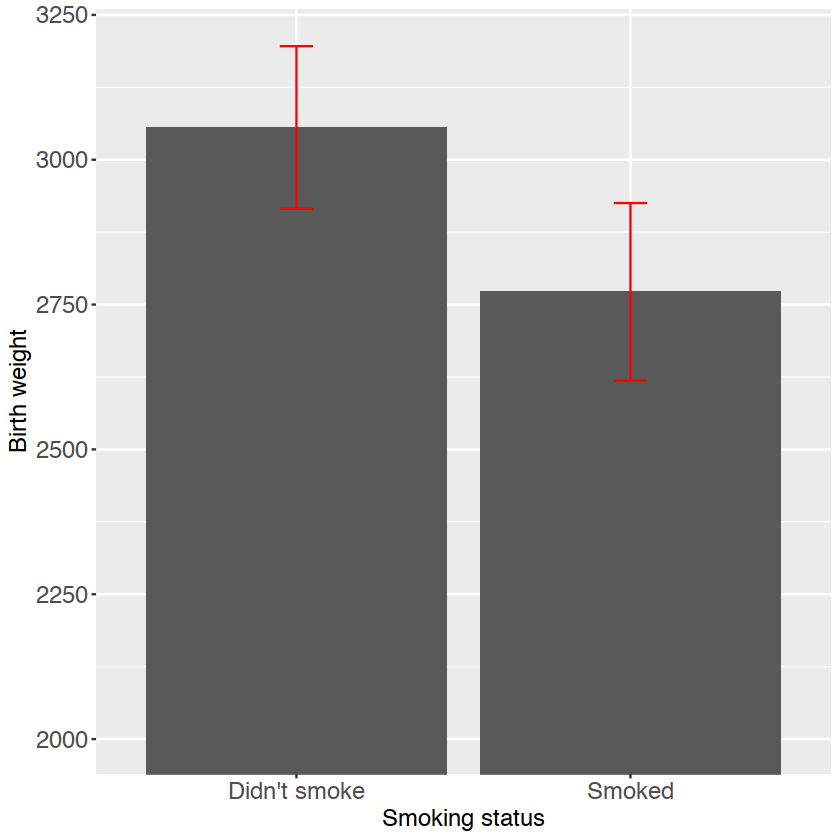

In [69]:
# Your answer here!

# START
ggplot(data_by_group, aes(x = factor(smoke), y = bwt_mean)) +
  geom_col() +
  geom_errorbar(aes(ymin = bwt_lb, ymax = bwt_ub),
                color = "red", width = .1) +
  scale_x_discrete(labels = c("Didn't smoke", "Smoked")) +
  labs(x = "Smoking status", y = "Birth weight") +
  coord_cartesian(ylim = c(2000, 3200)) +
  theme(axis.text = element_text(size = 14),
        axis.title = element_text(size = 14))

# END

The two individual confidence intervals overlap, so it could go either way. We need to conduct a more careful analysis to determine whether or not there is a statistically significant difference between the
two parameters (i.e., need to construct the confidence interval for the difference in means to be sure).

**9. Is there a positive association between mother's weight at last menstrual period and infant birth weight? Plot both variables and calculate the correlation coefficient.**

[1] 0.1857333

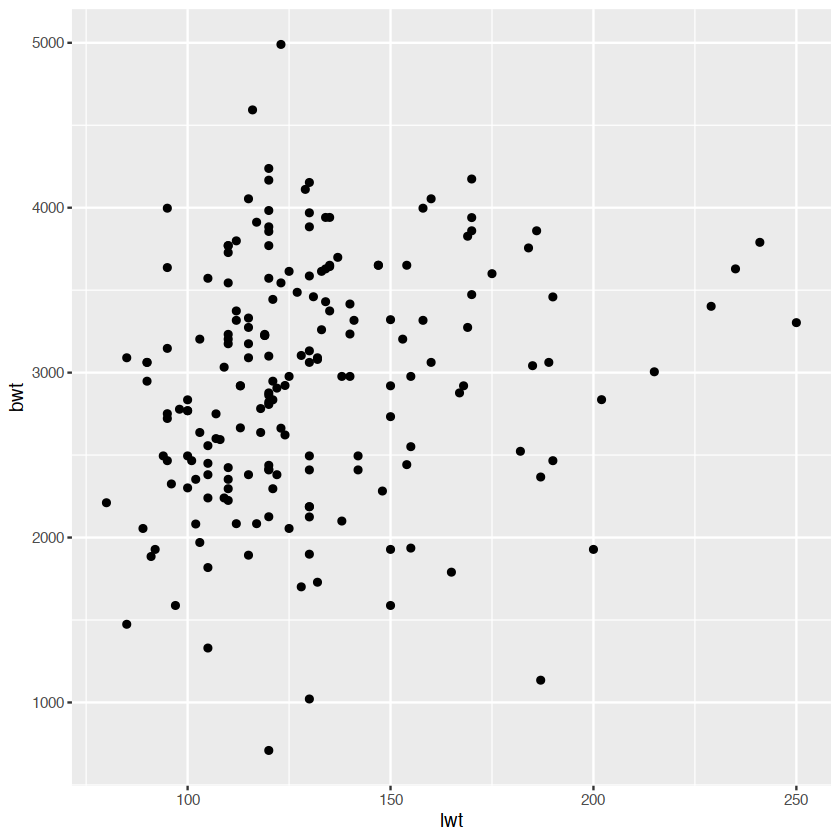

In [70]:
ggplot(birthwt)+
  geom_point(aes(x = lwt, y = bwt))

cor(birthwt$lwt, birthwt$bwt)